In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import warnings
import os
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [2]:
#Load File
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df = df.rename(columns={'N': 'Nitrogen (N)'})
df = df.rename(columns={'P': 'Phosphorous (P)'})
df = df.rename(columns={'K': 'Potassium (K)'})

In [4]:
#Exploratory Data Analysis

In [5]:
df.dtypes
#All data types look good, no need to change any data types.

Nitrogen (N)         int64
Phosphorous (P)      int64
Potassium (K)        int64
temperature        float64
humidity           float64
ph                 float64
rainfall           float64
label               object
dtype: object

In [6]:
df.shape

(2200, 8)

In [7]:
df.describe()

,Nitrogen (N),Phosphorous (P),Potassium (K),temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.isnull().sum()
#None null values, all look good so far.

Nitrogen (N)       0
Phosphorous (P)    0
Potassium (K)      0
temperature        0
humidity           0
ph                 0
rainfall           0
label              0
dtype: int64

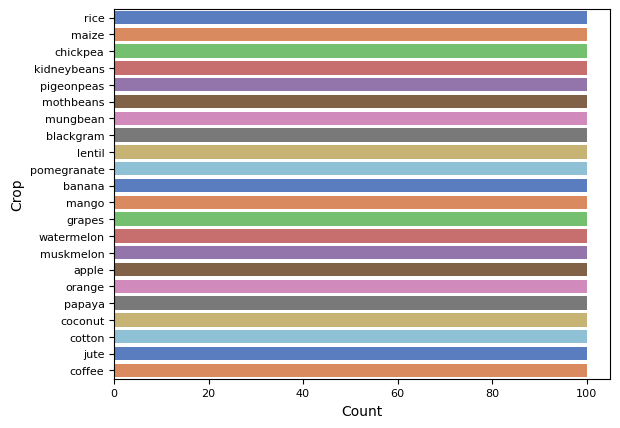

In [9]:
#Check if data is balanced
bplot = sns.countplot(y='label',data=df, palette="muted")
bplot.set_ylabel('Crop', fontsize=10)
bplot.set_xlabel('Count', fontsize=10) 
bplot.tick_params(labelsize=8)

In [10]:
#data set without column 'label'
df_2 = df.drop(columns=['label'])

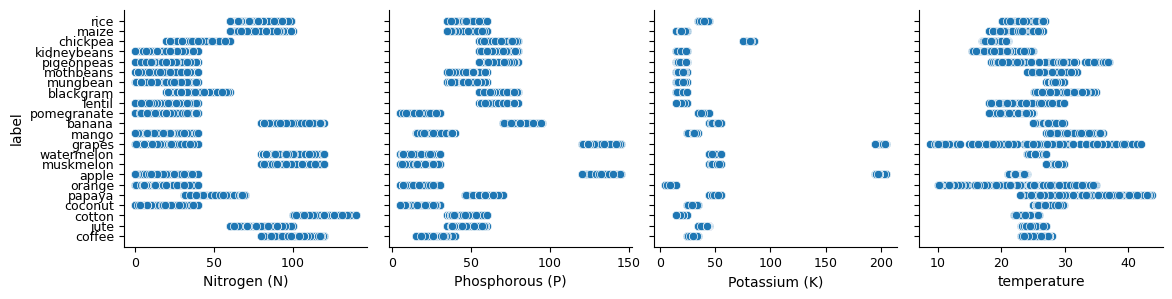

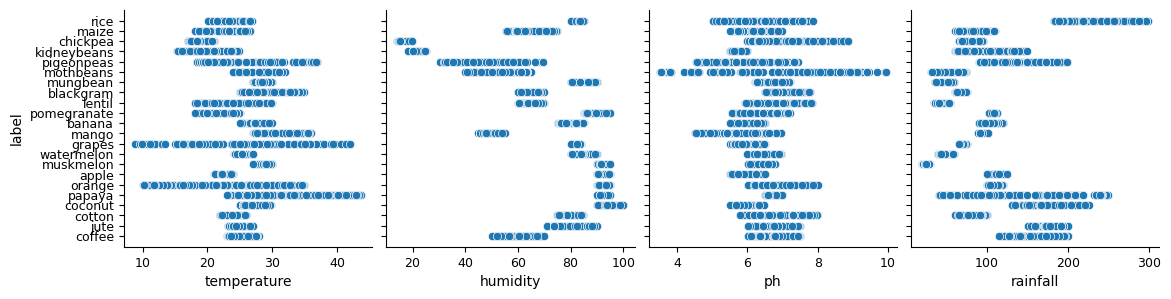

In [11]:
for i in range(0, 6, 3):
   pplot = sns.pairplot(data=df,
                x_vars=df.columns[i:i+4],
                y_vars=['label'], height=3)
   pplot.tick_params(labelsize=9)  

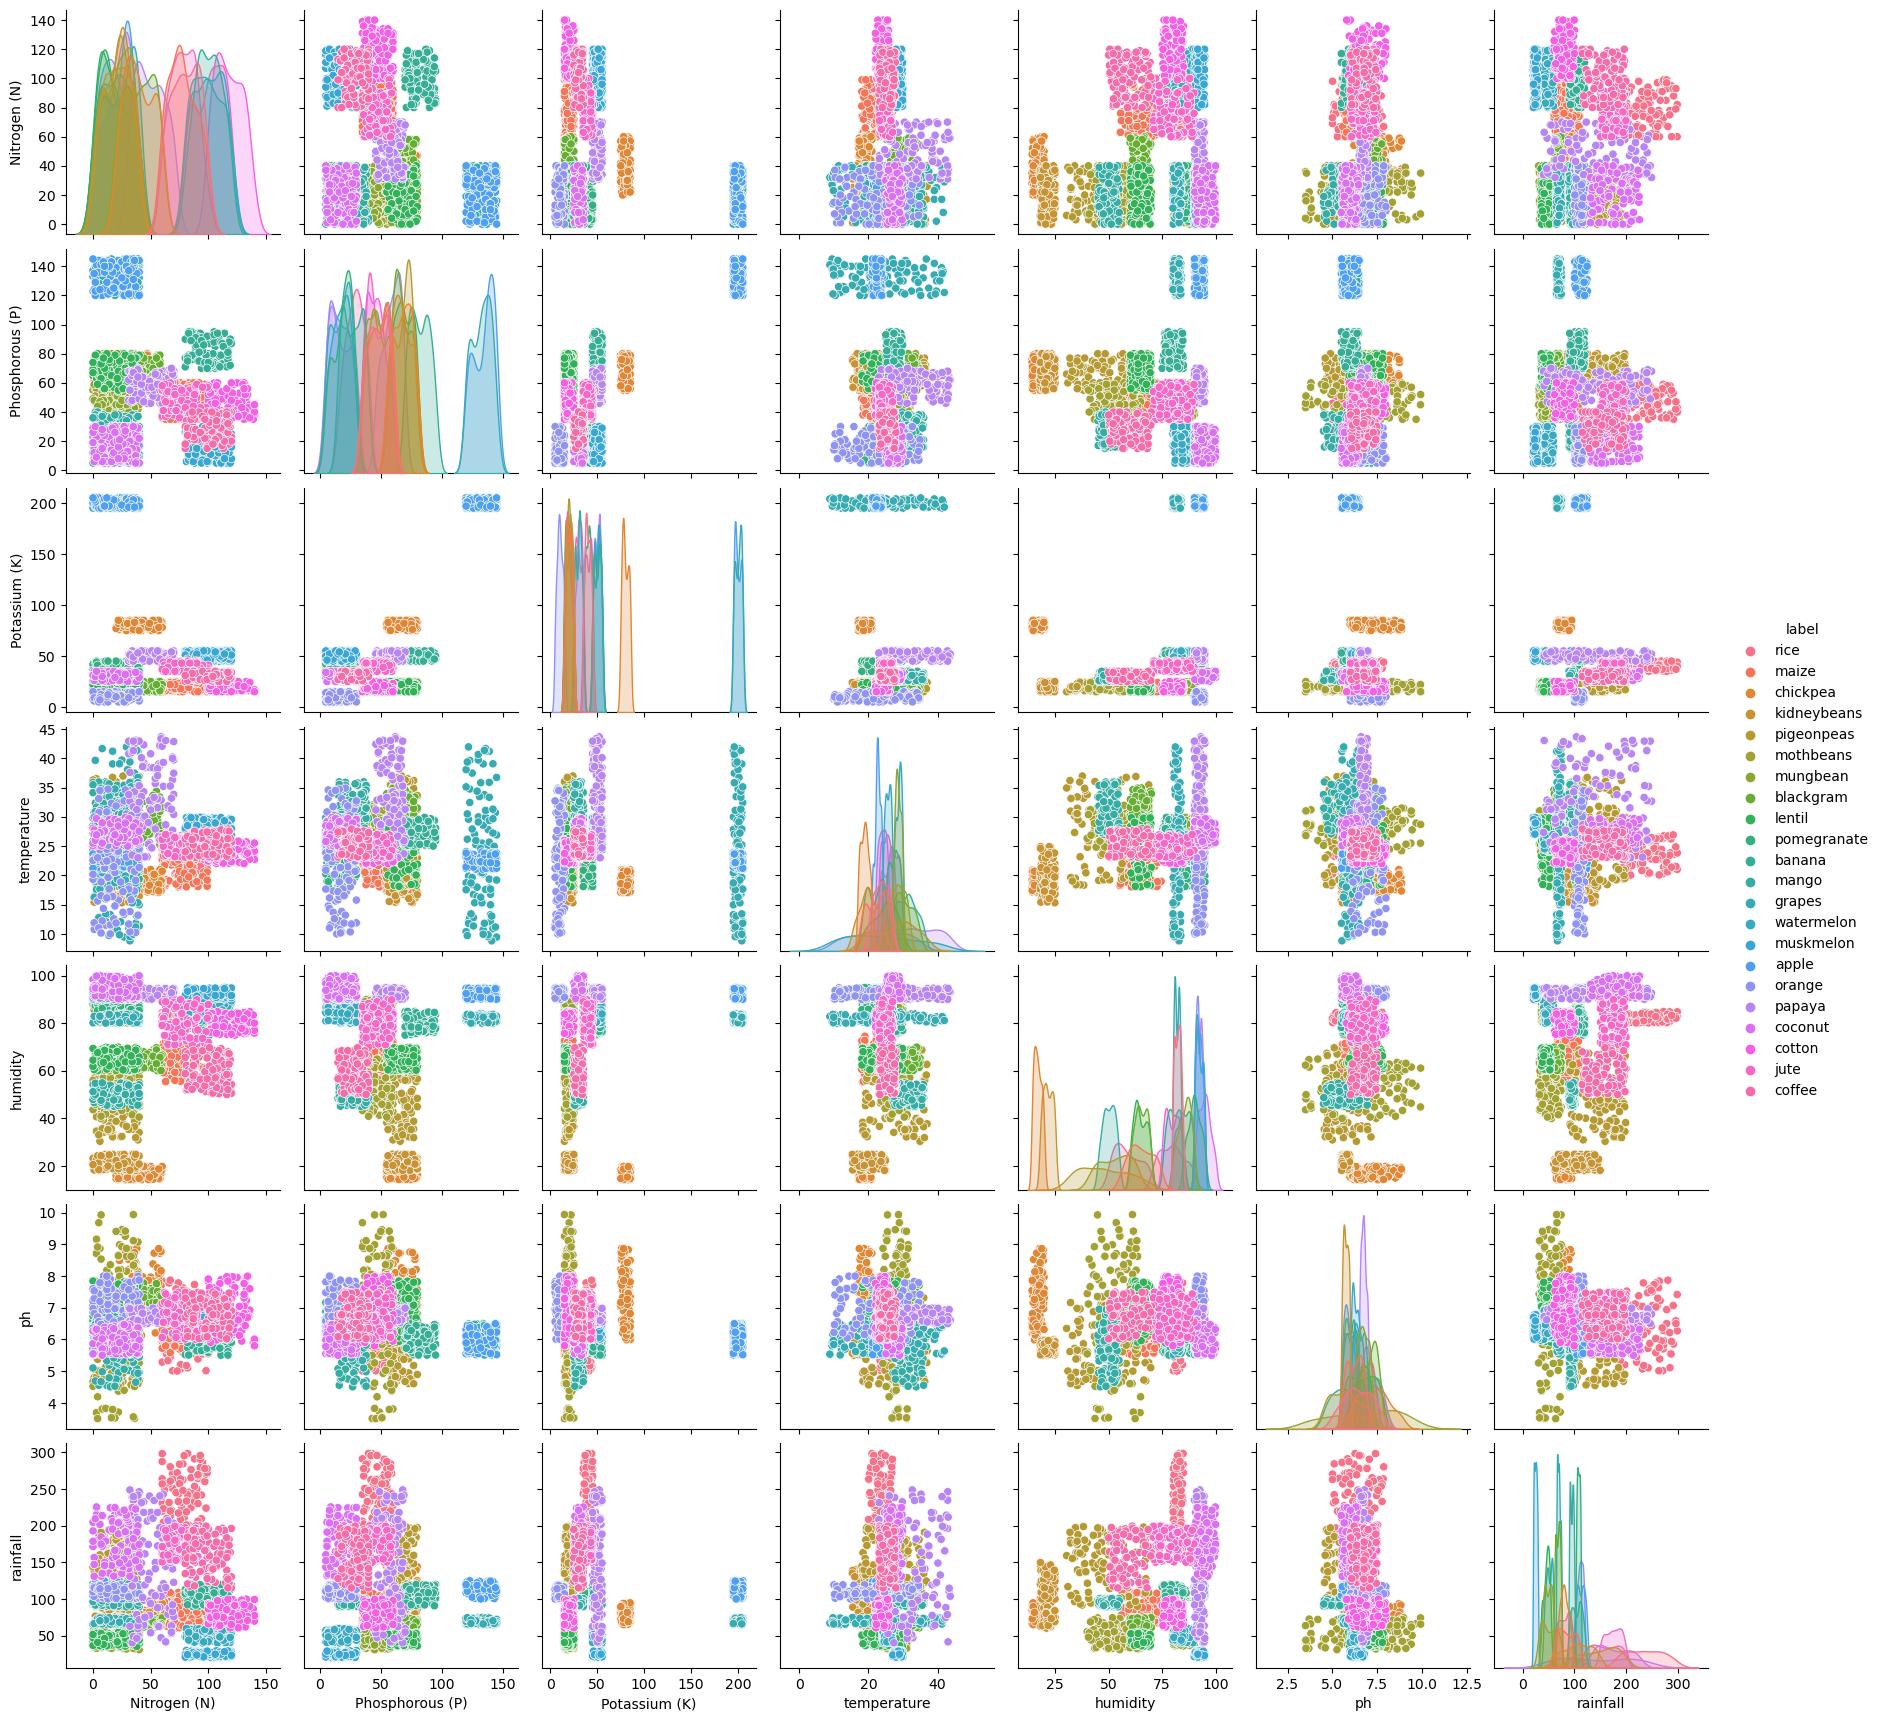

In [12]:
sns.pairplot(data=df, hue = 'label')

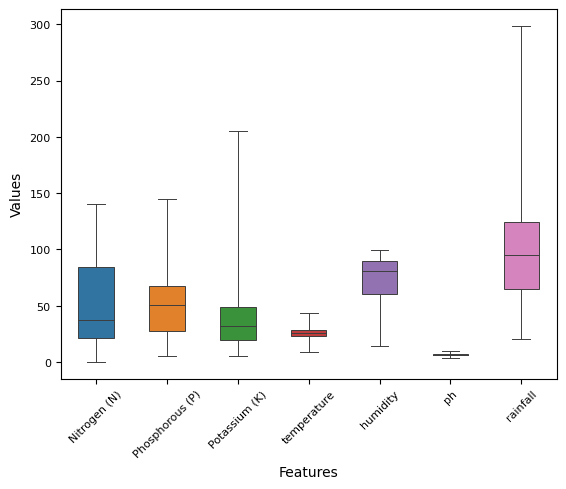

In [13]:
# Create a box plot for my data  
splot = sns.boxplot(data=df_2, whis=np.inf,                              
        width=0.5, linewidth = 0.7)

# Labels and clean up on the plot                                                                                                                                                                                                                                                                                              
splot.set_ylabel('Values', fontsize=10)
splot.set_xlabel('Features', fontsize=10)  
splot.tick_params(labelsize=8)                                                                    
splot.yaxis.grid(True, clip_on=False)   
plt.xticks(rotation=45)
splot.grid(False)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Nitrogen (N)'),
  Text(1.5, 0, 'Phosphorous (P)'),
  Text(2.5, 0, 'Potassium (K)'),
  Text(3.5, 0, 'temperature'),
  Text(4.5, 0, 'humidity'),
  Text(5.5, 0, 'ph'),
  Text(6.5, 0, 'rainfall')])

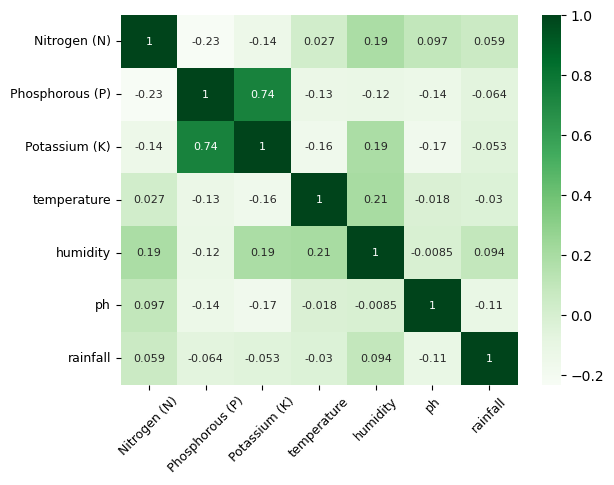

In [14]:
cormat = df_2.corr()
round(cormat,2)
hplot = sns.heatmap(cormat,cmap="Greens", annot=True, annot_kws={"size": 8})
hplot.tick_params(labelsize=9)
plt.xticks(rotation=45)

In [15]:
#Data Pre-Processing

In [16]:
#Convert labels into categories codes
r = df.label.astype('category')
response = dict(enumerate(r.cat.categories))
df['response']=r.cat.codes

#Declare and set y and X variables
y=df.response
X=df[['Nitrogen (N)','Phosphorous (P)','Potassium (K)','temperature','humidity','ph','rainfall']]

In [17]:
#Data Split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10)

In [18]:
len(X_train)

1760

In [19]:
#Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#-----------------------------------------Implementation of SVM Classifier-----------------------------------------------

In [21]:
model_svm = svm.SVC(kernel='rbf', C=10)

In [22]:
#Training of classifier on training data
model_svm.fit(X_train_scaled, y_train)

#Prediction
y_pred = model_svm.predict(X_test_scaled)

#Model Accuracy
accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ", accuracy)

Accuracy:  0.993


In [23]:
#Precision, recall, and F1 score
precision = round(precision_score(y_test, y_pred, average='weighted',zero_division=1),3)
recall = round(recall_score(y_test, y_pred, average='weighted'),3)
f1 = round(f1_score(y_test, y_pred, average='weighted'),3)

# Print the precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.993
Recall: 0.993
F1 Score: 0.993


In [24]:
# K-fold Cross Validation

kfold = KFold(n_splits=5, shuffle=True, random_state=10)

#k-fold iteration
scores = []
for train_index, test_index in kfold.split(X):
    X_train3, y_train3 = X.iloc[train_index], y.iloc[train_index]
    X_test3, y_test3 = X.iloc[test_index], y.iloc[test_index]
    model_svm.fit(X_train3, y_train3)

    y_pred = model_svm.predict(X_test3)
    score = accuracy_score(y_test3, y_pred)

    #Append the accuracy score for this fold to the list of scores
    scores.append(score)

#Mean accuracy across all folds
mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.985


In [25]:
#-----------------------------------------Implementation of Decision Tree Model-----------------------------------------------

In [26]:
#Decision Tree classifier object
model_dt = DecisionTreeClassifier(max_depth = 10, criterion = 'gini', random_state=10)

In [27]:
#Training of classifier on training data
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

In [28]:
#Prediction
y_pred = model_dt.predict(X_test_scaled)

#Model Accuracy
accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ", accuracy)

Accuracy:  0.991


In [29]:
#Precision, recall, and F1 score
precision = round(precision_score(y_test, y_pred, average='weighted',zero_division=1),3)
recall = round(recall_score(y_test, y_pred, average='weighted'),3)
f1 = round(f1_score(y_test, y_pred, average='weighted'),3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.992
Recall: 0.991
F1 Score: 0.991


In [30]:
# K-fold Cross Validation

kfold = KFold(n_splits=5, shuffle=True, random_state=10)

#k-fold iteration
scores = []
for train_index, test_index in kfold.split(X):
    X_train2, y_train2 = X.iloc[train_index], y.iloc[train_index]
    X_test2, y_test2 = X.iloc[test_index], y.iloc[test_index]
    
    model_dt.fit(X_train2, y_train2)

    y_pred = model_dt.predict(X_test2)
    score = accuracy_score(y_test2, y_pred)

    #Append the accuracy score for this fold to the list of scores
    scores.append(score)

#Mean accuracy across all folds
mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean accuracy:", mean_accuracy)

Mean accuracy: 0.986


In [31]:
#-----------------------------------------Implementation of Random Forest-----------------------------------------------

In [32]:
model_rf = RandomForestClassifier(max_depth=6, n_estimators=120, random_state=10)

In [33]:
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, n_estimators=120, random_state=10)

In [34]:
#Prediction
y_pred = model_rf.predict(X_test_scaled)

#Model Accuracy
accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ", accuracy)

Accuracy:  0.998


In [35]:
#Precision, recall, and F1 score
precision = round(precision_score(y_test, y_pred, average='weighted',zero_division=1),3)
recall = round(recall_score(y_test, y_pred, average='weighted'),3)
f1 = round(f1_score(y_test, y_pred, average='weighted'),3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.998
Recall: 0.998
F1 Score: 0.998


In [36]:
# K-fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

#k-fold iteration
scores = []
for train_index, test_index in kfold.split(X):
    X_train_k, y_train_k = X.iloc[train_index], y.iloc[train_index]
    X_test_k, y_test_k = X.iloc[test_index], y.iloc[test_index]
    model_rf.fit(X_train_k, y_train_k)

    y_pred = model_rf.predict(X_test_k)
    score = accuracy_score(y_test_k, y_pred)

    #Append the accuracy score for this fold to the list of scores
    scores.append(score)

#Mean accuracy across all folds
mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.99


([<matplotlib.axis.XTick at 0x796f5a273d60>,
 [Text(0, 0, 'humidity'),
  Text(1, 0, 'rainfall'),
  Text(2, 0, 'Potassium (K)'),
  Text(3, 0, 'Phosphorous (P)'),
  Text(4, 0, 'Nitrogen (N)'),
  Text(5, 0, 'temperature'),
  Text(6, 0, 'ph')])

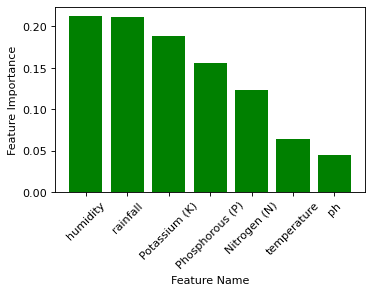

In [37]:
plt.figure(figsize=(5, 3), dpi=80)
importance_sorted = sorted(zip(model_rf.feature_importances_, X_train.columns), reverse=True)
feature_importance = [imp for imp, _ in importance_sorted]
feature_names = [name for _, name in importance_sorted]

c_features = len(feature_importance)
plt.bar(range(c_features), feature_importance, color = "green")
plt.ylabel("Feature Importance")
plt.xlabel("Feature Name")
plt.xticks(np.arange(c_features), feature_names, rotation=45)